In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import powerlaw as POW
from tqdm import tqdm
import multiprocessing
from multiprocessing import Pool
from timeit import default_timer as timer
#import seaborn as sns
from Hopp.functions import *
from Evo.Basic_activations import *
from scipy.spatial import distance
import networkx as nx

In [2]:
def get_degrees(w):
    #w_1=np.copy(w)
    graph=nx.from_numpy_array(w)
    degrees=graph.degree()
    sort_pos=sorted(degrees, key=lambda x:x[1], reverse=True)
    return graph, degrees, sort_pos
    

In [3]:
end_point_list=[]
energy=[]
state_list=[]
N=150
num_relaxations=2000
relaxation=10*N
num_iterations=num_relaxations*relaxation
weights=np.heaviside(np.random.choice(2, N*N),-1)
weights=weights.reshape(N, N)
weights=(weights+weights.T)/2
np.fill_diagonal(weights, 0)
weights_original=np.copy(weights)
state_1=Generate_state(N)
for i in tqdm(range(num_iterations)):
    if i%relaxation==0 and i!=0:
        end_point=Binary_energy(state_1, weights_original)
        end_point_list.append(end_point)
        state_list.append(np.copy(state_1))
        state_1=Generate_state(N)
    if i<=num_iterations/2:
        Binary_update(state_1, weights)
        energy.append(Binary_energy(state_1, weights))
    if i>num_iterations/2:
        Binary_update(state_1, weights)
        delta_w=Self_modeling(state_1, 0.00025/500)
        weights+=delta_w

100%|██████████| 3000000/3000000 [02:13<00:00, 22398.79it/s]


Text(0.5, 1.0, 'Energy')

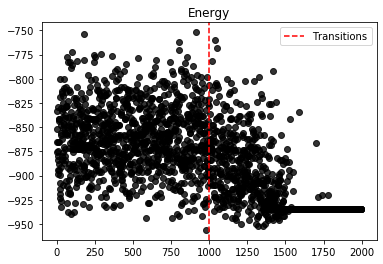

In [4]:
plt.scatter(np.arange(0, len(end_point_list)), end_point_list, color="k", alpha=0.8);
plt.axvline(1000, c="r", linestyle="dashed", label="Transitions");
plt.legend();
plt.title("Energy")


In [5]:
np.save("weights_rand_init.npy", weights)

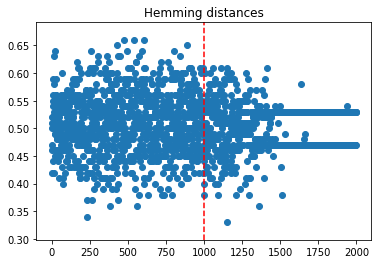

In [5]:
example=np.ones((100,1))
hamming_dist=[distance.hamming(example, x) for x in state_list]
plt.scatter(np.arange(len(hamming_dist)), hamming_dist);
plt.axvline(1000, c="r", linestyle="dashed", label="Transitions");
plt.title("Hemming distances");
#plt.savefig("Hemming distances")

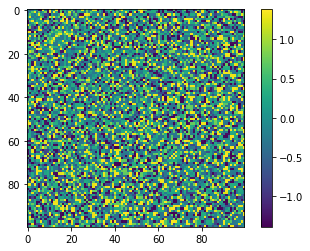

In [11]:
plt.imshow(weights)
plt.colorbar();

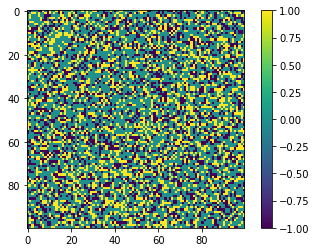

In [10]:
plt.imshow(weights_original)
plt.colorbar();

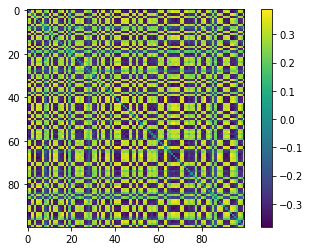

In [12]:
plt.imshow(weights_original-weights)
plt.colorbar();

In [14]:
weights_diff=weights-weights_original

In [13]:
before_pos=np.copy(weights_original)
before_neg=np.copy(weights_original)
before_pos[before_pos<0]=0
before_neg[before_neg>0]=0
before_pos_g, before_pos_d, before_pos_s=get_degrees(before_pos)
before_neg_g, before_neg_d, before_neg_s=get_degrees(before_neg)
after_pos=np.copy(weights)
after_neg=np.copy(weights)
after_pos[after_pos<0]=0
after_neg[after_neg>0]=0
after_pos_g, after_pos_d, after_pos_s=get_degrees(after_pos)
after_neg_g, after_neg_d, after_neg_s=get_degrees(after_neg)

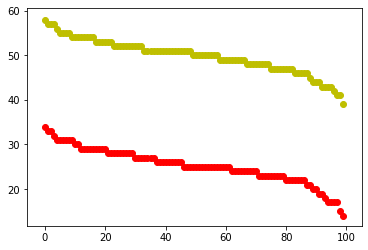

In [21]:
plt.scatter(np.arange(100), [before_pos_s[i][1] for i in range(100)], color="r");
plt.scatter(np.arange(100), [after_pos_s[i][1] for i in range(100)], color="y");

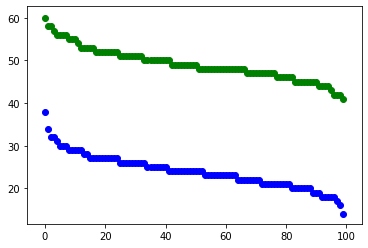

In [22]:
plt.scatter(np.arange(100), [before_neg_s[i][1] for i in range(100)], color="b");
plt.scatter(np.arange(100), [after_neg_s[i][1] for i in range(100)], color="g");

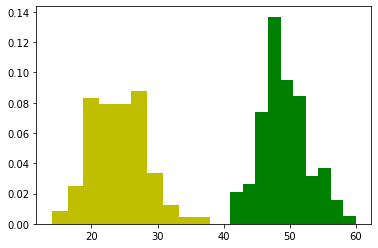

In [29]:
plt.hist([after_neg_s[i][1] for i in range(100)], color="g", density=True);
plt.hist([before_neg_s[i][1] for i in range(100)], color="y", density=True);

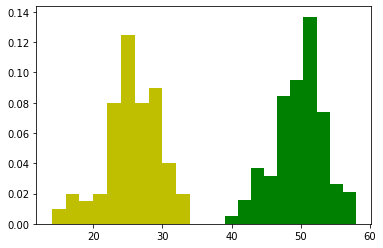

In [30]:
plt.hist([after_pos_s[i][1] for i in range(100)], color="g", density=True);
plt.hist([before_pos_s[i][1] for i in range(100)], color="y", density=True);

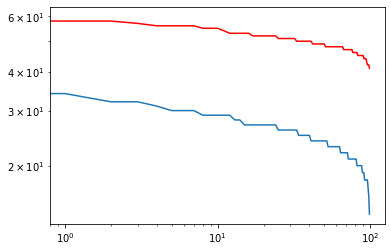

In [32]:
plt.loglog([before_neg_s[i][1] for i in range(100)])
plt.loglog([after_neg_s[i][1] for i in range(100)], c="r")

In [36]:
pos_diff=np.copy(weights_diff)
neg_diff=np.copy(weights_diff)
pos_diff[pos_diff<0]=0
neg_diff[neg_diff>0]=0
pos_diff_g, pos_diff_d, pos_diff_s=get_degrees(pos_diff)
neg_diff_g, neg_diff_d, neg_diff_s=get_degrees(neg_diff)

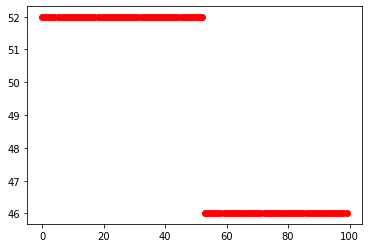

In [37]:
plt.scatter(np.arange(100), [pos_diff_s[i][1] for i in range(100)], color="r");

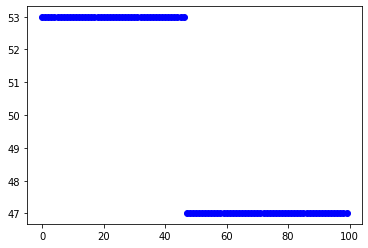

In [38]:
plt.scatter(np.arange(100), [neg_diff_s[i][1] for i in range(100)], color="b");

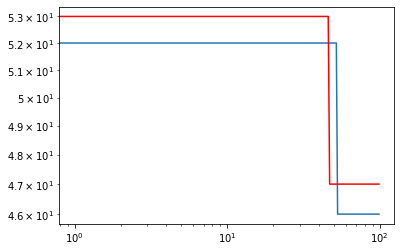

In [39]:
plt.loglog([pos_diff_s[i][1] for i in range(100)])
plt.loglog([neg_diff_s[i][1] for i in range(100)], c="r")

In [32]:
ls_1=[]
new_state=Generate_state(100)
for i in range(100000):
    if i%1000==0 and i!=0:
        new_state=Generate_state(100)
    Binary_update(new_state, weights_diff)
    ls_1.append(Binary_energy(new_state,weights_original))

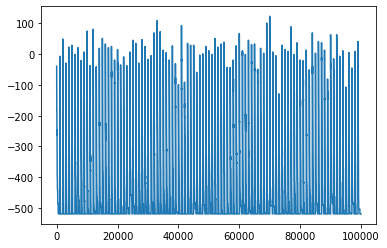

In [33]:
plt.plot(ls_1)

In [34]:
np.amin(ls_1)

-519.0

In [35]:
np.amin(end_point_list)

-527.0

In [42]:
L=np.array([[1,2,3],[5,6,7],[8,9,10]])

In [43]:
L

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [44]:
L[0,:]

array([1, 2, 3])